# Semua Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow.keras as keras
from tensorflow.keras.models import load_model
from tensorflow.keras import layers,regularizers,models
from tensorflow.keras.utils import register_keras_serializable
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, TensorBoard
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from tensorflow.keras.losses import CategoricalCrossentropy

# Analisis Data Obesitas

Import dataset Obesitas

In [2]:
data_obesitas = pd.read_csv('https://raw.githubusercontent.com/Bhayazeed/Dataset_submisi_dicoding_ziid/refs/heads/main/ObesityDataSet.csv')

In [3]:
data_obesitas = data_obesitas.drop(columns=['MTRANS'])
data_obesitas = data_obesitas.drop(columns=['family_history_with_overweight'])
data_obesitas = data_obesitas.drop(columns=['FAVC'])
data_obesitas = data_obesitas.drop(columns=['SMOKE'])
data_obesitas = data_obesitas.drop(columns=['SCC'])
data_obesitas = data_obesitas.drop(columns=['CALC'])
data_obesitas = data_obesitas.drop(columns=['CAEC'])

In [4]:
data_obesitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2111 non-null   object 
 1   Age         2111 non-null   float64
 2   Height      2111 non-null   float64
 3   Weight      2111 non-null   float64
 4   FCVC        2111 non-null   float64
 5   NCP         2111 non-null   float64
 6   CH2O        2111 non-null   float64
 7   FAF         2111 non-null   float64
 8   TUE         2111 non-null   float64
 9   NObeyesdad  2111 non-null   object 
dtypes: float64(8), object(2)
memory usage: 165.0+ KB


In [5]:
data_obesitas.head()

,Gender,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,Female,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight
1,Female,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight
2,Male,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight
3,Male,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I
4,Male,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II


In [6]:
data_obesitas.duplicated().sum()

25

In [7]:
data_obesitas.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
FCVC,0
NCP,0
CH2O,0
FAF,0
TUE,0
NObeyesdad,0


In [8]:
data_obesitas.drop_duplicates(inplace=True)

 Cek keseimbangan data

In [9]:
Cek_balanced_data = data_obesitas['NObeyesdad'].value_counts(normalize=True)
Cek_balanced_data

,proportion
NObeyesdad,
Obesity_Type_I,0.168265
Obesity_Type_III,0.155321
Obesity_Type_II,0.142378
Overweight_Level_II,0.139022
Normal_Weight,0.135187
Overweight_Level_I,0.132311
Insufficient_Weight,0.127517


Menampilkan jumlah Obesitas berdasarkan tipe

<ipython-input-10-9c153ccde290>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='NObeyesdad', data=data_obesitas, order=data_obesitas['NObeyesdad'].value_counts().index, palette="viridis")


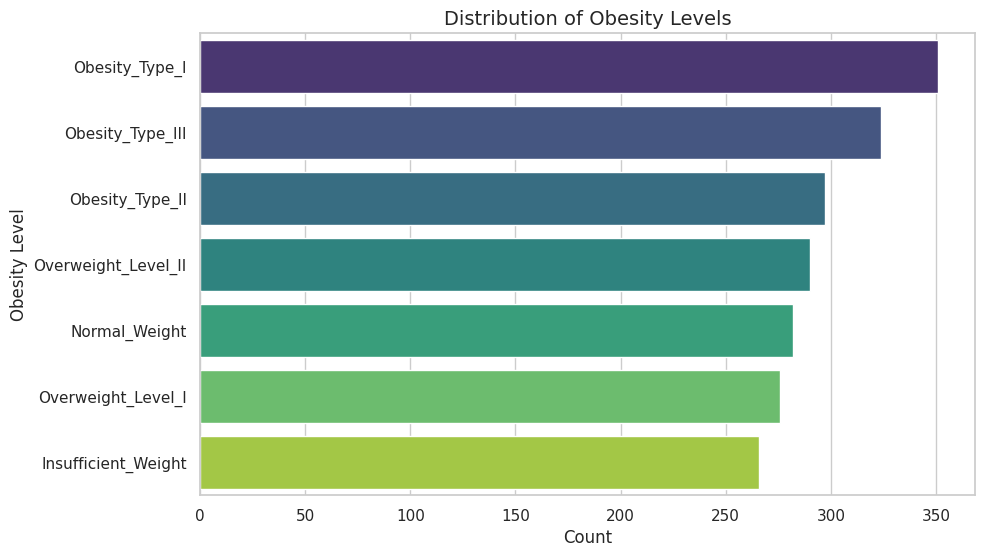

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='NObeyesdad', data=data_obesitas, order=data_obesitas['NObeyesdad'].value_counts().index, palette="viridis")
plt.title('Distribution of Obesity Levels', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Obesity Level')
plt.show()

# Pembuatan Model Obesitas

Drop kolom data yang tidak digunakan

In [11]:
data_obesitas.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
FCVC,0
NCP,0
CH2O,0
FAF,0
TUE,0
NObeyesdad,0


In [12]:
data_obesitas.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
FCVC,0
NCP,0
CH2O,0
FAF,0
TUE,0
NObeyesdad,0


Mapping kolom float menjadi int

In [13]:
gender_mapping = {'Male': 1, 'Female': 0}
yes_no_mapping = {'yes': 1, 'no': 0}
WeightType = {'Normal_Weight': 'Normal_Weight','Insufficient_Weight': 'Insufficient_Weight', 'Overweight_Level_I': 'Overweight', 'Overweight_Level_II': 'Overweight', 'Obesity_Type_I': 'Obesity', 'Obesity_Type_II': 'Obesity', 'Obesity_Type_III': 'Obesity'}

data_obesitas['Gender'] = data_obesitas['Gender'].map(gender_mapping)
data_obesitas['NObeyesdad'] = data_obesitas['NObeyesdad'].map(WeightType)

In [14]:
data_obesitas.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
FCVC,0
NCP,0
CH2O,0
FAF,0
TUE,0
NObeyesdad,0


In [15]:
Cek_balanced_data = data_obesitas['NObeyesdad'].value_counts(normalize=True)
Cek_balanced_data

,proportion
NObeyesdad,
Obesity,0.465964
Overweight,0.271333
Normal_Weight,0.135187
Insufficient_Weight,0.127517


<ipython-input-16-9c153ccde290>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='NObeyesdad', data=data_obesitas, order=data_obesitas['NObeyesdad'].value_counts().index, palette="viridis")


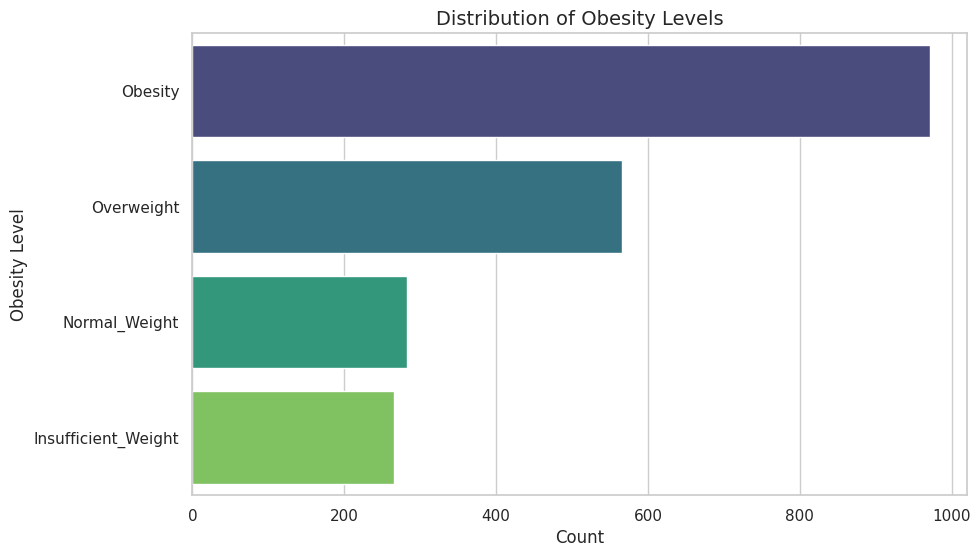

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='NObeyesdad', data=data_obesitas, order=data_obesitas['NObeyesdad'].value_counts().index, palette="viridis")
plt.title('Distribution of Obesity Levels', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Obesity Level')
plt.show()

In [17]:
def min_max_normalize(data, new_min=0, new_max=1):
    min_val = np.min(data)
    max_val = np.max(data)

    # Avoid division by zero if all values are the same
    if min_val == max_val:
        return np.full(data.shape, new_min)

    normalized_data = (data - min_val) / (max_val - min_val) * (new_max - new_min) + new_min
    return normalized_data

In [18]:
min_max_normalize(data_obesitas['Age'])
min_max_normalize(data_obesitas['Height'])
min_max_normalize(data_obesitas['Weight'])
min_max_normalize(data_obesitas['FCVC'])
min_max_normalize(data_obesitas['NCP'])
min_max_normalize(data_obesitas['CH2O'])
min_max_normalize(data_obesitas['FAF'])
min_max_normalize(data_obesitas['TUE'])

,TUE
0,0.500000
1,0.000000
2,0.500000
3,0.000000
4,0.000000
...,...
2106,0.453124
2107,0.299635
2108,0.323144
2109,0.293017


Mapping kolom Y menjadi Int

In [19]:
weight_category_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight': 2,
    'Obesity': 3,
}
data_obesitas['NObeyesdad'] = data_obesitas['NObeyesdad'].map(weight_category_mapping)

In [20]:
print(data_obesitas['NObeyesdad'])

0       1
1       1
2       1
3       2
4       2
       ..
2106    3
2107    3
2108    3
2109    3
2110    3
Name: NObeyesdad, Length: 2086, dtype: int64


Menentukan X dan y

In [21]:
X = data_obesitas.drop(columns=['NObeyesdad']).values
y = data_obesitas['NObeyesdad'].values

In [22]:
X = X.astype(np.float32)
y = y.astype(np.int32)

Split data menjadi train dan test menggunakan stratified split

In [23]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

In [24]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
train_dataset = (train_dataset
                 .shuffle(buffer_size=1000)
                 .batch(64)
                 .prefetch(tf.data.experimental.AUTOTUNE))
test_dataset = (test_dataset
                .batch(64)
                .prefetch(tf.data.experimental.AUTOTUNE))

In [26]:
@register_keras_serializable()
def custom_relu(x):
    return K.maximum(0.0, x)

Membuat model menggunakan Neuron network dan Dense Layer

In [27]:
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(256, kernel_regularizer=regularizers.l2(0.001)),
    layers.Lambda(custom_relu),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.001)),
    layers.Lambda(custom_relu),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.001)),
    layers.Lambda(custom_relu),
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_2 (Lambda)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 170,564 (666.27 KB)

 Trainable params: 168,900 (659.77 KB)

 Non-trainable params: 1,664 (6.50 KB)

In [29]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    mode='max',
    restore_best_weights=True
)

In [31]:
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [32]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

In [33]:
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * 0.1

lr_scheduler = LearningRateScheduler(scheduler)

In [34]:
history = model.fit(train_dataset, epochs=200,  validation_data=(test_dataset),callbacks=[checkpoint, lr_scheduler, reduce_lr, early_stopping])

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4950 - loss: 1.7797
Epoch 1: val_accuracy improved from -inf to 0.25833, saving model to best_model.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.4978 - loss: 1.7715 - val_accuracy: 0.2583 - val_loss: 3.7396 - learning_rate: 1.0000e-04
Epoch 2/200
27/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7314 - loss: 1.0801 
Epoch 2: val_accuracy improved from 0.25833 to 0.26111, saving model to best_model.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7356 - loss: 1.0674 - val_accuracy: 0.2611 - val_loss: 2.6685 - learning_rate: 1.0000e-04
Epoch 3/200
27/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.9757  
Epoch 3: val_accuracy improved from 0.26111 to 0.33472, saving model to best_model.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7695 - loss: 0.9693 - val_accuracy: 0.3347 - val_loss: 1.9881 - learning_rate: 1.0000e-04
Epoch 4/200
27/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

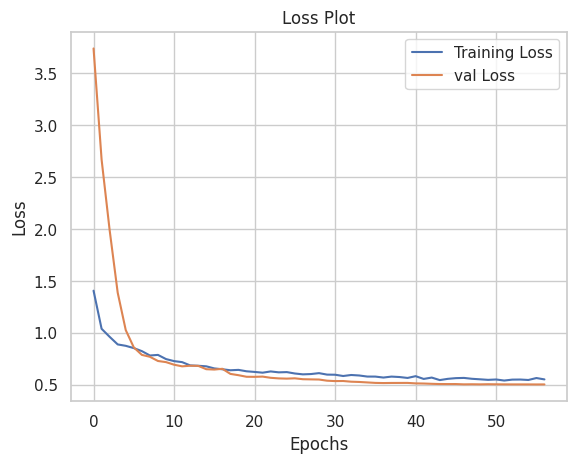

In [35]:
plt.title('Loss Plot')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Menampilkan grafik
plt.show()

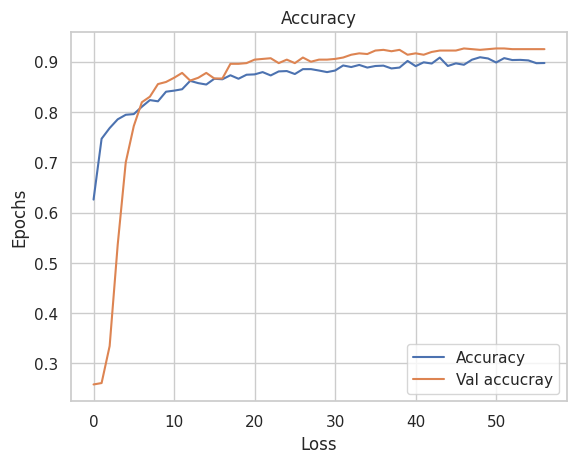

In [36]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val accucray')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [37]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9086 - loss: 0.5423   
Test accuracy: 0.9263888597488403


In [38]:
model.save('weight_category_model.h5')

In [39]:
data_obesitas.head()

,Gender,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1
1,0,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1
2,1,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1
3,1,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,2
4,1,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,2


In [40]:
data_obesitas.tail()

,Gender,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
2106,0,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,3
2107,0,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,3
2108,0,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,3
2109,0,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,3
2110,0,23.664709,1.738836,133.472641,3.0,3.0,2.863513,1.026452,0.714137,3


In [41]:
A = np.array([[0,	21.0,	1.62,	64.0,	2.0,	3.0,	2.0,	0.0,	1.0	]])
predicted_category = model.predict(A)
predicted_category_index = np.argmax(predicted_category)
print(predicted_category)
print(predicted_category_index)
if predicted_category_index == 0:
  print('Insufficient_Weight')
elif predicted_category_index == 1:
  print('Normal_Weight')
elif predicted_category_index == 2:
  print('Overweight')
else:
  print('Obesity')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
[[0.00248746 0.49365255 0.50017595 0.00368406]]
2
Overweight


In [42]:
B = np.array([[1,	27.0,	1.80,	87.0,	3.0,	3.0,	2.0,	2.0,	0.0	]])
predicted_category = model.predict(B)
predicted_category_index = np.argmax(predicted_category)
print(predicted_category)
print(predicted_category_index)
if predicted_category_index == 0:
  print('Insufficient_Weight')
elif predicted_category_index == 1:
  print('Normal_Weight')
elif predicted_category_index == 2:
  print('Overweight')
else:
  print('Obesity')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.00435515 0.02065528 0.89517355 0.07981595]]
2
Overweight


In [43]:
C = np.array([[0,	23.664709,	1.738836,	133.472641,	3.0,	3.0,	2.863513,	1.026452,	0.714137]])
predicted_category = model.predict(C)
predicted_category_index = np.argmax(predicted_category)
print(predicted_category)
print(predicted_category_index)
if predicted_category_index == 0:
  print('Insufficient_Weight')
elif predicted_category_index == 1:
  print('Normal_Weight')
elif predicted_category_index == 2:
  print('Overweight')
else:
  print('Obesity')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[3.8646289e-05 2.9988209e-06 2.7541375e-05 9.9993086e-01]]
3
Obesity


In [44]:
D = np.array([[1,	23.0,	1.80,	77.0,	2.0,	3.0,	2.0,	2.0,	1.0]])
predicted_category = model.predict(D)
predicted_category_index = np.argmax(predicted_category)
print(predicted_category)
print(predicted_category_index)
if predicted_category_index == 0:
  print('Insufficient_Weight')
elif predicted_category_index == 1:
  print('Normal_Weight')
elif predicted_category_index == 2:
  print('Overweight')
else:
  print('Obesity')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.00207086 0.36091247 0.63488644 0.0021302 ]]
2
Overweight


In [45]:
E = np.array([[1, 20, 1.76, 55,	2.0,	4.0,	3.0,	2.0,	2.0]])
predicted_category = model.predict(E)
predicted_category_index = np.argmax(predicted_category)
print(predicted_category)
print(predicted_category_index)
if predicted_category_index == 0:
  print('Insufficient_Weight')
elif predicted_category_index == 1:
  print('Normal_Weight')
elif predicted_category_index == 2:
  print('Overweight')
else:
  print('Obesity')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[9.8352283e-01 1.3662548e-02 5.7764066e-04 2.2369423e-03]]
0
Insufficient_Weight


In [47]:
data_obesitas.to_csv('updated_obesitas_prediction.csv', index=False)